<a href="https://colab.research.google.com/github/liamhall64/Habitable-Exomoons/blob/main/Exomoon_Code_MK2_Cold_Gas_Giants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Filter Archive

In [1]:
# IMPORTS
import pandas as pd
import math
import numpy as np
from astropy import constants as const
from astropy import units as u

# IF USING GOOGLE COLAB TO RUN THIS NOTEBOOK USE THIS CELL:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Read in CSV files

If you are using Google Colab to run this Notebook, use this cell:

In [2]:
archive = pd.read_csv('gdrive/My Drive/Exomoon Project/Exoplanet_Archive.csv')
archive = archive.fillna(0)
#archive.columns.values.tolist()


If you are using Jupyter Notebook or similar, use this cell:

In [ ]:
'''
# READ IN CSV FILE
archive = pd.read_csv(r'C:\Users\Liam PC\OneDrive - Cardiff University\Modules\Exomoons\Archive\Exoplanet_Archive.csv') # PC
#archive = pd.read_csv(r'C:\Users\liamh\OneDrive - Cardiff University\Modules\Exomoons\Archive\Exoplanet_Archive.csv') # TABLET

archive = archive.fillna(0) # REPLACES ALL NaN VALUES WITH 0 - PROBLEM AROSE WHEN FILTERING FOR TRANSIT FLAGS AND DEPTH/DURATION ETC
# LISTING ALL COLUMNS FOR EASY ACCESS TO COLUMNS
archive.columns.values.tolist()
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 46-47: truncated \UXXXXXXXX escape (<ipython-input-3-1b8de2573e6e>, line 9)

# Filtering out by radius
For Earth-sized planets, we use $0.5 ≤ R_⊕ ≤ 2$ and for cold gas giants, we use the radius limits between sub-neptunes $4R_⊕ ≤ R ≤ 2R_J$.

MASS-RADIUS RELATIONS AND CORE-ENVELOPE DECOMPOSITIONS
OF SUPER-EARTHS AND SUB-NEPTUNES (Howe et al 2014) https://iopscience.iop.org/article/10.1088/0004-637X/787/2/173/pdf

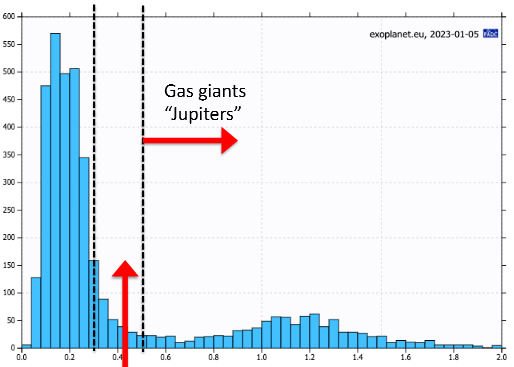

In [3]:
rade = archive['pl_rade']
radj = archive['pl_radj']
rad_filt = archive[(rade >= 4) & (radj <= 10)]

print('Done.')
rad_filt

Done.


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,2,1,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1,2,0,0,0
1,2,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
2,3,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
3,4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,4,1,0,0
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,6.095,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5666,5667,ups And b,ups And,b,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5667,5668,ups And c,ups And,c,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5668,5669,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5669,5670,ups Leo b,ups Leo,b,0,0,TIC 49430557,Gaia DR2 3794167001116433152,1,1,...,0.000,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0


In [4]:
#pd.set_option('display.max_columns', None) # PRINTS WHOLE TABLE OF COLUMNS - MAY CRASH COMPUTER SINCE IT IS A LARGE DATAFRAME
#pd.set_option('display.max_rows', None) # PRINTS WHOLE TABLE OF ROWS - MAY CRASH COMPUTER SINCE IT IS A LARGE DATAFRAME

#THESE ARE THE CONDITIONS FOR EACH COLUMN, WHERE WE WANT TO MEET SPECIFIC CONDITIONS FOR EACH INDIVIDUAL COLUMN AND REMOVE ANY ROWS THAT DO NOT MEET THESE CONDITIONS
disc = rad_filt['discoverymethod'].str.contains('Transit') # CONTAINS THE WORD 'transit' IN EACH ROW
con_A = rad_filt['tran_flag'] == 1 # EXACTLY EQUAL TO 1
con_B = rad_filt['ttv_flag'] == 1
con_C = rad_filt['pl_trandep'] != 0 # NOT EQUAL TO 0
con_D = rad_filt['pl_trandur'] != 0
#con_E = rad_filt['pl_tranmid'] != 0

combined = disc | con_A | con_B | con_C | con_D #| con_E # THIS IS THE COMBINATION OF ALL THE CONDITIONS WITH '|' BEING THE 'or' OPERATOR

method_radius_filt = rad_filt[combined]

#method_radius_filt[['discoverymethod','tran_flag','ttv_flag','pl_trandep','pl_trandur','pl_tranmid']] # TEST TO SEE IF THE ABOVE CODE WORKS
print('Done.')
len(method_radius_filt)

Done.


995

# Calculating the CHZ
#### Using Equations from page 10 in Kopparapu et al (2013)
###### https://iopscience.iop.org/article/10.1088/0004-637X/765/2/131/pdf#page=10.44

#### **Assuming a Sun-like star temperature*...

In [5]:
T_seff = method_radius_filt['st_teff'] - 5780

# Recent Venus
a_v = 1.4316e-4
b_v = 2.9875e-9
c_v = -7.5702e-12
d_v = -1.1635e-15

VS_eff = 1.7753 + (a_v*T_seff) + (b_v*T_seff**2) + (c_v*T_seff**3) + (d_v*T_seff**4)


# Early Mars
a_m = 5.4513e-5
b_m = 1.5313e-9
c_m = -2.7786e-12
d_m = -4.8997e-16

MS_eff = 0.3179 + (a_m*T_seff) + (b_m*T_seff**2) + (c_m*T_seff**3) + (d_m*T_seff**4)

#print(VS_eff, MS_eff)
print('Done.')

Done.


In [6]:
R_star = method_radius_filt['st_rad']*const.R_sun # CONVERTING RADIUS OF STAR IN METERS
T = method_radius_filt['st_teff']

L = 4 * math.pi * R_star**2 * const.sigma_sb * T**4 # CALCULATION OF LUM RATHER THAN USING GIVEN LUM
LL_sun = L/const.L_sun

in_CHZ = (LL_sun/VS_eff)**0.5 # CALCULATION FOR THE INNER LIMIT
out_CHZ = (LL_sun/MS_eff)**0.5 # CALCULATION FOR THE OUTER LIMIT

in_CHZ = pd.DataFrame({'in_CHZ': in_CHZ}) # GIVES TWO NEW COLUMNS OWN HEADER
out_CHZ = pd.DataFrame({'out_CHZ': out_CHZ}) # GIVES TWO NEW COLUMNS OWN HEADER
print('Done.')

Done.


In [7]:
# ADDING THE NEW CHZ COLUMNS TO THE FILTERED DATAFRAME
filtered = pd.concat([method_radius_filt, in_CHZ, out_CHZ], axis=1) # CONCAT IS CONCATENATION - JOINING TWO STRINGS INTO ONE
filtered

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,in_CHZ,out_CHZ
89,90,CoRoT-1 b,CoRoT-1,b,0,0,TIC 36352297,Gaia DR2 3105507886130792448,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,6,1,0,5,20,0.879236,2.062048
90,91,CoRoT-10 b,CoRoT-10,b,0,0,TIC 405010127,Gaia DR2 4263752921128319616,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0,0.471434,1.151939
91,92,CoRoT-11 b,CoRoT-11,b,0,0,TIC 110178537,Gaia DR2 4285511294172309504,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0,1.247586,2.867807
92,93,CoRoT-12 b,CoRoT-12,b,0,0,TIC 280210963,Gaia DR2 3107255598526406912,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0,0.816022,1.937683
93,94,CoRoT-13 b,CoRoT-13,b,0,0,TIC 281909674,Gaia DR2 3101974231859723776,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0,0.798841,1.873911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,5617,XO-3 b,XO-3,b,0,0,TIC 8400842,Gaia DR2 470650560777348352,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,50,4,0,5,0,1.398169,3.215285
5617,5618,XO-4 b,XO-4,b,0,0,TIC 51234631,Gaia DR2 990291507088739072,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,11,1,0,2,0,1.304915,3.004488
5618,5619,XO-5 b,XO-5,b,0,0,TIC 9155187,Gaia DR2 920308932010648448,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,26,2,0,0,0,0.761239,1.828531
5619,5620,XO-6 b,XO-6,b,0,0,TIC 138168780,Gaia DR2 1114308481600798336,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0,1.895219,4.313541


Assuming that the orbits follow a Keplarian orbit, the orbit semi-major axis is mean distance from its parent star in AU.

In [8]:
# FILTERS OUT PLANETS WITH ORBITAL SEPARATION OUTSIDE THIS CALCULATED RANGE OF CHZ

filtered_archive = filtered[(filtered['pl_orbsmax'] >= filtered['in_CHZ']) & (filtered['pl_orbsmax'] <= filtered['out_CHZ'])]
filtered_archive
#print('Done.')

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,in_CHZ,out_CHZ
1856,1857,KIC 5437945 b,KIC 5437945,b,0,0,TIC 121603086,Gaia DR2 2102070660978313472,1,2,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,0,0,0,0,0,1.098448,2.534696
1862,1863,KIC 9663113 b,KIC 9663113,b,0,0,TIC 272844987,Gaia DR2 2080266967444876032,1,2,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,0,0,0,0.843856,1.969257
1970,1971,KOI-351 h,KOI-351,h,0,0,TIC 267667295,Gaia DR2 2132193431285570304,1,8,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,0,0,0,0.987420,2.302814
2704,2705,Kepler-1519 b,Kepler-1519,b,0,0,TIC 351191596,Gaia DR2 2086851495906130176,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,0,0,0,0.656617,1.561408
2810,2811,Kepler-16 b,Kepler-16,b,0,0,TIC 299096355,Gaia DR2 2133476355197071616,2,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,6,0,0,0.305022,0.767936
2845,2846,Kepler-1625 b,Kepler-1625,b,0,0,TIC 184011870,Gaia DR2 2076280000851171328,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,0,0,0,0.685303,1.627134
2848,2849,Kepler-1628 b,Kepler-1628,b,0,0,TIC 123362984,Gaia DR2 2105245187265625728,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,0,0,0,0.174505,0.453628
2875,2876,Kepler-1647 b,Kepler-1647,b,0,0,TIC 170344769,Gaia DR2 2073793420945053824,2,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,0,0,0,1.528818,3.546175
2952,2953,Kepler-1704 b,Kepler-1704,b,0,0,TIC 350738167,Gaia DR2 2136191736602006016,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0,1.266155,2.996748
2955,2956,Kepler-1708 b,Kepler-1708,b,0,0,TIC 272716898,Gaia DR2 2078801971283008128,1,1,...,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,0,0,0,0.942247,2.190369


In [9]:
# TEST TO SEE IF THE RADIUS IS WITHIN THE RANGE AND SEPARATION WITHIN THE CALCULATED CIRCUMSTELLAR HABITABLE ZONE
test = filtered_archive[['pl_name','sy_dist', 'pl_radj', 'st_teff', 'pl_orbsmax','in_CHZ','out_CHZ']]

#test.iloc[1970]

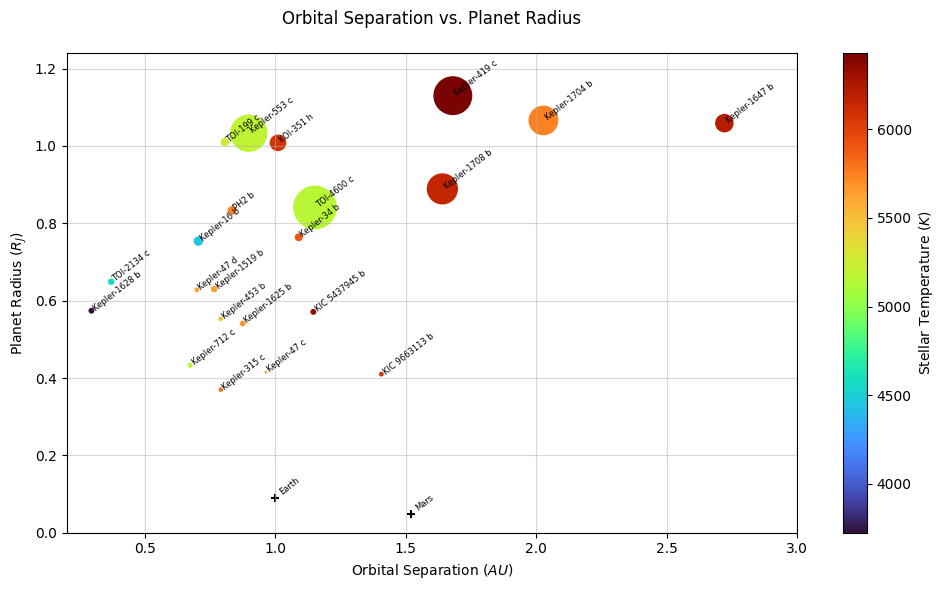

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sc = plt.scatter(filtered_archive['pl_orbsmax'], filtered_archive['pl_radj'], s=filtered_archive['pl_bmassj'] * 100, c=filtered_archive['st_teff'], cmap='turbo')

for i in range(len(filtered_archive)):
  plt.text(filtered_archive['pl_orbsmax'].iloc[i], filtered_archive['pl_radj'].iloc[i], filtered_archive['pl_name'].iloc[i], fontsize=6, rotation=38)

plt.colorbar(sc, label='Stellar Temperature ($K$)')
plt.ylabel('Planet Radius ($R_J$)')
plt.xlabel('Orbital Separation ($AU$)')
plt.title('Orbital Separation vs. Planet Radius\n')
plt.xlim(0.2, 3)
plt.ylim(0, 1.24)

plt.scatter(1, 0.0892147, marker = '+', color = 'black', label = 'Earth')
plt.scatter(1.52, 0.0474, marker = '+', color = 'black', label = 'Mars')
plt.text(1+0.01, 0.0892147+0.01, 'Earth', fontsize=6, rotation=38)
plt.text(1.52+0.01, 0.0474+0.01, 'Mars', fontsize=6, rotation=38)

#plt.scatter(5.2,1,marker='+',color='black',label='Jupiter')
#plt.text(5.2+0.01,1+0.01,'Jupiter',fontsize=6,rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('a_vs_Rp_temp.png', dpi = 1200)
plt.show()

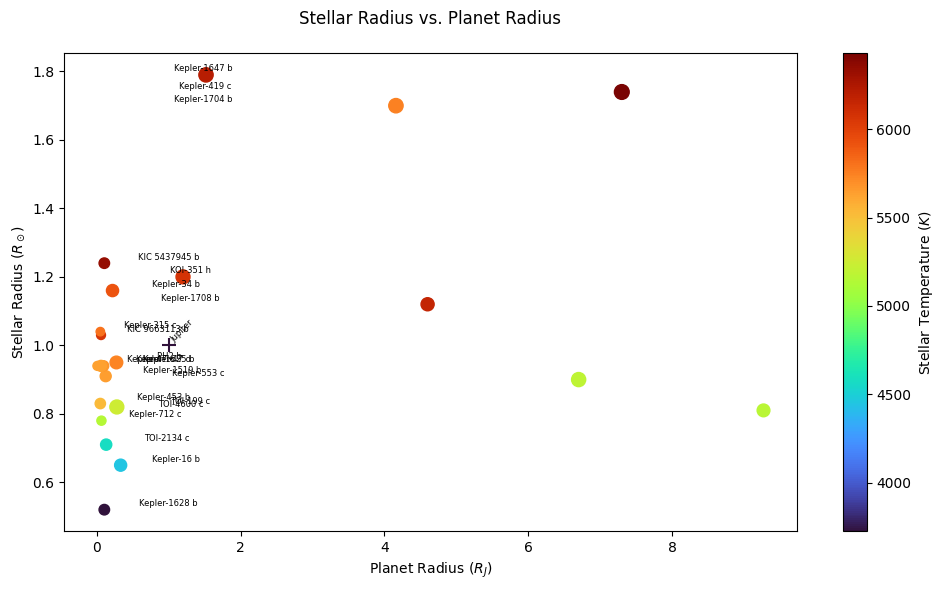

In [11]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(filtered_archive['pl_bmassj'], filtered_archive['st_rad'], s=filtered_archive['pl_radj'] * 100, c=filtered_archive['st_teff'], cmap='turbo')

for i in range(len(filtered_archive)):
  plt.text(filtered_archive['pl_radj'].iloc[i]+0.01, filtered_archive['st_rad'].iloc[i]+0.01, filtered_archive['pl_name'].iloc[i], fontsize=6)#, rotation=37)

plt.colorbar(sc, label='Stellar Temperature ($K$)')
plt.ylabel('Stellar Radius ($R_\odot$)')
plt.xlabel('Planet Radius ($R_J$)')
plt.title('Stellar Radius vs. Planet Radius\n')
#plt.xlim(0.3, 1.25)
#plt.ylim(0.5, 1.95)

#plt.scatter(0.0892147, 1, marker = '+', color = 'black', label = 'Earth')
#plt.scatter(0.0474, 1, marker = '+', color = 'black', label = 'Mars')
plt.scatter(1,1, marker = '+', label = 'Jupiter', s=100, c=7000, cmap='turbo')

#plt.text(0.0892147+0.01, 1+0.01, 'Earth', fontsize=6, rotation=45)
#plt.text(0.0474+0.01, 1+0.01, 'Mars', fontsize=6, rotation=45)
plt.text(1+0.01, 1+0.01, 'Jupiter', fontsize=6, rotation=45)

plt.savefig('Rs_vs_Rp.png')#, dpi = 1200)
plt.tight_layout()
plt.show()

In [12]:
planet = filtered_archive.loc[1970,['pl_name','pl_radj', 'pl_bmassj', 'pl_dens', 'st_mass', 'st_rad', 'st_teff', 'st_lum', 'pl_orbper', 'pl_orbsmax','in_CHZ','out_CHZ']]
planet

,1970
pl_name,KOI-351 h
pl_radj,1.008
pl_bmassj,1.2
pl_dens,0.911829
st_mass,1.2
st_rad,1.2
st_teff,6080.0
st_lum,0.269
pl_orbper,331.60059
pl_orbsmax,1.01


Checking to see if the chosen exoplanet has at least 5 orbits (or observations) within 5 years of observing:

In [13]:
period = planet['pl_orbper']*u.day
years = 5 * 365.25*u.day
orbits = years / period # ORBITS OR TRANSITS

print(f'Planet completes {orbits:.1f} orbits within 5 years of observing.')

Planet completes 5.5 orbits within 5 years of observing.


# Hill Sphere and Roche Limit calculations
Hill sphere - https://iopscience.iop.org/article/10.3847/1538-3881/aacdf8/pdf

In [14]:
pl_name, Mp, Rp, a, Ms, Ts, per = planet['pl_name'], planet['pl_bmassj']*u.M_jup, planet['pl_radj']*u.R_jup, planet['pl_orbsmax']*u.au, planet['st_mass']*u.M_sun, planet['st_teff']*u.K, planet['pl_orbper']*u.day
Mp, Rp, a, Ms = Mp.to(u.kg), Rp.to(u.km), a.to(u.m), Ms.to(u.kg)

In [15]:
def hillsphere(Mp, Ms, a):
  hill = a*((Mp/(3*Ms)))**(1/3)
  return hill

hill = hillsphere(Mp, Ms, a)
print(f'Hill sphere for {pl_name} = {hill.to(u.au):.4f}')

# TEST HILL SPHERE FOR EARTH
hill_earth = hillsphere(const.M_earth, const.M_sun, const.au)
print(f'Test for Hill sphere for Earth = {hill_earth.to(u.AU):.2f} which is the correct value!')

Hill sphere for KOI-351 h = 0.0690 AU
Test for Hill sphere for Earth = 0.01 AU which is the correct value!


### Roche Limit
Assuming a planet density similar to that of Neptune ($1.64 g/cm^3$) and a moon density of $5 g/cm^3$ with moon masses similar to Mars, Earth and a super-Earth/sub-Neptune mass. These assumptions are needed to calculate the Roche limit in order to create the grid of probabilities.

In [16]:
def roche_lim(Rp, P_dens, M_dens):
  roche = Rp * (2*(P_dens/M_dens))**(1/3)
  return roche

In [17]:
MarsMass = 0.107 * const.M_earth
EarthMass = const.M_earth
SESN_Mass = 2 * const.M_earth

Moon_dens = 5000*u.kg/u.m**3
Plan_dens = 1640*u.kg/u.m**3

Mm = np.array([MarsMass.value, EarthMass.value, SESN_Mass.value])*u.kg

In [18]:
# TEST ON EARTH-MOON AND JUPITER-GANYMEDE SYSTEMS
roche_Earth = roche_lim(const.R_earth, 5513*u.kg/u.m**3, 3340*u.kg/u.m**3)
print(f'Roche limit for Earth-Moon = {roche_Earth.to(u.km):.3f}')

roche_jup = roche_lim(const.R_jup, 1326*u.kg/u.m**3, 1940*u.kg/u.m**3)
print(f'Roche limit for Jupiter-Ganymede = {roche_jup.to(u.km):.3f}')

Roche limit for Earth-Moon = 9496.899 km
Roche limit for Jupiter-Ganymede = 79344.113 km


In [19]:
roche = roche_lim(Rp, Plan_dens, Moon_dens)
print(f'Roche limit for Planet-Moon system = {roche.to(u.km):.3f}')

Roche limit for Planet-Moon system = 62616.087 km


## Now we assume to use the mass of the Earth for the moon orbiting around this exoplanet which is $5.972\times 10^{24}$kg for the probability...

In [20]:
# TTV PARAMETERS NEEDED:
Mp, a, roche, hill, Mp, per

(<Quantity 2.27774952e+27 kg>,
 <Quantity 1.51093849e+11 m>,
 <Quantity 62616.08714872 km>,
 <Quantity 1.03152392e+10 m>,
 <Quantity 2.27774952e+27 kg>,
 <Quantity 331.60059 d>)

In [21]:
# LIGHT CURVE PARAMETERS NEEDED:
Rp, Rs, temp, st_lum = planet['pl_radj']*u.R_jup, planet['st_rad']*u.R_sun, planet['st_teff']*u.K, planet['st_lum']
Rp, Rs, temp, st_lum = Rp.to(u.m), Rs.to(u.m), temp, st_lum
Rp, Rs, temp, st_lum

(<Quantity 72063936. m>, <Quantity 8.3484e+08 m>, <Quantity 6080. K>, 0.269)